<div style="text-align: center;">
    <img src="./Datasets/credit-score-image.jpg" alt="Imagen" />
</div>

1. 🚩 [Preparación](#preparation)  
   1.1 [Importar Librerías](#import-libraries)  
   1.2 [Cargar Datasets](#loading-datasets)

2. 🎚️ [Feature Engineering](#feature-engineering)  
   2.1 [Imputación de Faltantes](#imputation)  
   2.2 [Codificación de Variables Categóricas](#encoding)  
   2.3 [Tratamiento de Outliers](#outliers)  
   2.4 [Transformación de Variables](#transformation)    
   2.5 [Feature Scaling](#scaling)  
   2.6 [Nuevas características](#new_features)  

 3. 🗃️ [Guardar Dataset](#saving-files) 

## 1. 🚩 Preparación
<a id="preparation"></a>

## 1.1 Importar Librerías
<a id="import-libraries"></a>

In [7]:
import numpy as np
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
#from imblearn.over_sampling import SMOTE
from xgboost import XGBRegressor
import warnings
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore", category=FutureWarning)

## 1.2 Cargar Datasets
<a id="loading-datasets"></a>

In [8]:
dataset = pd.read_csv("./Datasets/dataset_new.csv")
dataset.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,NaN,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,265
1,February,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,0
2,March,500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,267
3,April,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,268
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,269


<a id="feature-engineering"></a>
## 1.🎚️Feature Engineering

<a id="imputation"></a>
## 1.1 🔢Imputación de Faltante

    Columnas con faltantes

In [9]:
col_con_nan = []

for col in dataset.columns:
    porcentaje_faltante = dataset[col].isnull().mean()
    if(porcentaje_faltante>0):
        col_con_nan.append(col)

col_con_nan

['Occupation',
 'Monthly_Inhand_Salary',
 'Type_of_Loan',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Payment_Behaviour']

    Porcentaje de faltantes para cada columna

In [10]:
proporcion_faltantes = dataset[col_con_nan].isnull().mean().sort_values(ascending=False)

proporcion_faltantes

Credit_Mix               0.20195
Monthly_Inhand_Salary    0.15002
Type_of_Loan             0.11408
Payment_Behaviour        0.07600
Occupation               0.07062
Num_Credit_Inquiries     0.01965
dtype: float64

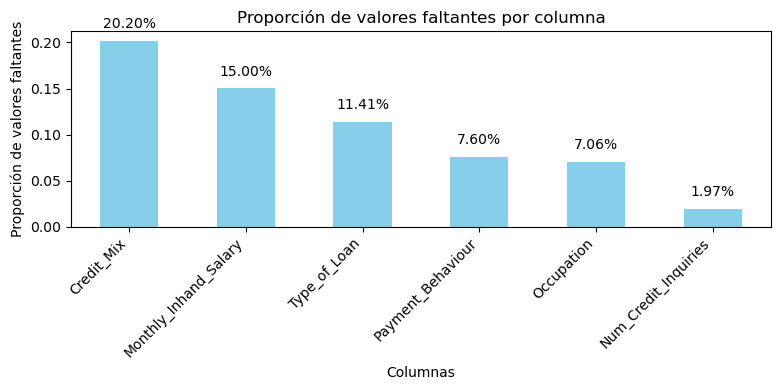

In [11]:
plt.figure(figsize=(8, 4))
bars = proporcion_faltantes.plot(kind='bar', color='skyblue')

# Añadir etiquetas de porcentaje a cada barra
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval*100:.2f}%", ha='center', va='bottom')

plt.title('Proporción de valores faltantes por columna')
plt.xlabel('Columnas')
plt.ylabel('Proporción de valores faltantes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

    Imputación de variables numéricas

In [12]:
numerical = dataset.select_dtypes(include=np.number)
numerical.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Age_Months
0,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,4.0,809.98,26.822620,49.574949,80.415295,312.494089,265
1,23,19114.12,NaN,3,4,3,4,-1,0,11.27,4.0,809.98,31.944960,49.574949,118.280222,284.629162,0
2,500,19114.12,NaN,3,4,3,4,3,7,0.00,4.0,809.98,28.609352,49.574949,81.699521,331.209863,267
3,23,19114.12,NaN,3,4,3,4,5,4,6.27,4.0,809.98,31.377862,49.574949,199.458074,223.451310,268
4,23,19114.12,1824.843333,3,4,3,4,6,0,11.27,4.0,809.98,24.797347,49.574949,41.420153,341.489231,269


In [13]:
# Contar valores faltantes antes de la imputación
faltantes_antes = []

for col in numerical.columns:
    porcentaje_faltante = numerical[col].isnull().mean()
    if(porcentaje_faltante>0):
        faltantes_antes.append(col)

dataset[faltantes_antes].isnull().mean().sort_values(ascending=False)

Monthly_Inhand_Salary    0.15002
Num_Credit_Inquiries     0.01965
dtype: float64

    CCA - Complete Case Analysis

In [14]:
cols_for_cca = [col for col in dataset[faltantes_antes].columns if dataset[col].isnull().mean()<0.06]
cols_for_cca

['Num_Credit_Inquiries']

    Imputación de media

In [15]:
cols_for_mean = [col for col in dataset[faltantes_antes].columns if dataset[col].isnull().mean()<0.20]

dataset[cols_for_mean].isnull().mean().sort_values(ascending=False)

Monthly_Inhand_Salary    0.15002
Num_Credit_Inquiries     0.01965
dtype: float64

In [16]:
mean_col = dataset[cols_for_mean].fillna(dataset[cols_for_mean].mean())
mean_col.isnull().sum()

Monthly_Inhand_Salary    0
Num_Credit_Inquiries     0
dtype: int64

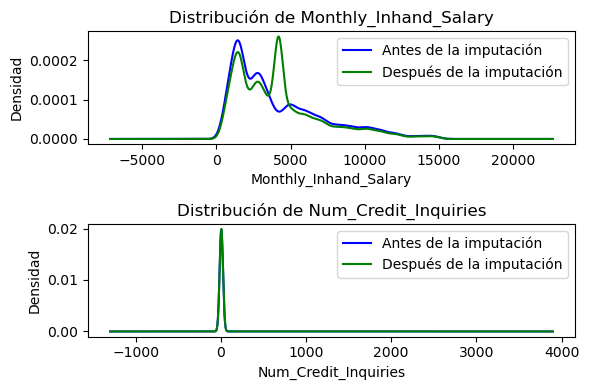

In [17]:
fig, axs = plt.subplots(len(cols_for_mean), 1, figsize=(6, 2*len(cols_for_mean)))

for i, col in enumerate(cols_for_mean):
    dataset[col].plot.density(color='blue', label='Antes de la imputación', ax=axs[i])
    mean_col[col].plot.density(color='green', label='Después de la imputación', ax=axs[i])
    axs[i].set_title(f'Distribución de {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Densidad')
    axs[i].legend()
# Ajustar la disposición de los subplots
plt.tight_layout()

# Mostrar la gráfica
plt.show()

    Imputación de mediana

In [18]:
median_col = dataset[cols_for_mean].fillna(dataset[cols_for_mean].median())
median_col.isnull().sum()

Monthly_Inhand_Salary    0
Num_Credit_Inquiries     0
dtype: int64

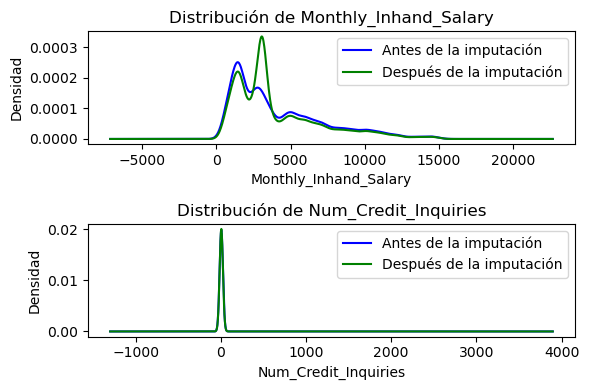

In [19]:
# Crear figura y ejes de subplots
fig, axs = plt.subplots(len(cols_for_mean), 1, figsize=(6, 2*len(cols_for_mean)))

for i, col in enumerate(cols_for_mean):
    dataset[col].plot.density(color='blue', label='Antes de la imputación', ax=axs[i])
    median_col[col].plot.density(color='green', label='Después de la imputación', ax=axs[i])
    axs[i].set_title(f'Distribución de {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Densidad')
    axs[i].legend()
# Ajustar la disposición de los subplots
plt.tight_layout()

# Mostrar la gráfica
plt.show()

    Generación de números aleatorios en base a la distribución

In [20]:
random_col = dataset[faltantes_antes].apply(lambda x: x.fillna(np.random.choice(x.dropna()), axis=0) if x.isnull().sum() > 0 else x)
random_col.isnull().sum()

Monthly_Inhand_Salary    0
Num_Credit_Inquiries     0
dtype: int64

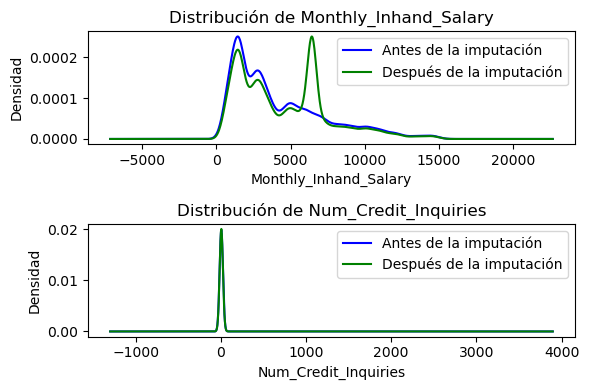

In [21]:
# Crear figura y ejes de subplots
fig, axs = plt.subplots(len(faltantes_antes), 1, figsize=(6, 2*len(faltantes_antes)))

for i, col in enumerate(faltantes_antes):
    dataset[col].plot.density(color='blue', label='Antes de la imputación', ax=axs[i])
    random_col[col].plot.density(color='green', label='Después de la imputación', ax=axs[i])
    axs[i].set_title(f'Distribución de {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Densidad')
    axs[i].legend()
# Ajustar la disposición de los subplots
plt.tight_layout()

# Mostrar la gráfica
plt.show()

    Elección

In [22]:
dataset_new= dataset.copy()

Un valor de diferencia de varianza más bajo indica que el método de imputación preserva mejor la varianza original de los datos.

In [23]:
# Calcular la varianza del dataset original
varianza_original = dataset[faltantes_antes].var()

# Calcular las diferencias en varianza después de la imputación para cada método
diferencia_media = abs(mean_col.var() - varianza_original)
diferencia_mediana = abs(median_col.var() - varianza_original)
diferencia_random = abs(random_col.var() - varianza_original)

diferencias = pd.DataFrame({
    'Media': diferencia_media,
    'Mediana': diferencia_mediana,
    'Random': diferencia_random
}, index=varianza_original.index)  

# Mostrar la media de las diferencias
print("Media de diferencias de varianza:")
print(diferencias)

Media de diferencias de varianza:
                              Media       Mediana         Random
Monthly_Inhand_Salary  1.520597e+06  1.366184e+06  878267.990252
Num_Credit_Inquiries   7.332959e+02  7.241792e+02     726.520303


* **Monthly_Inhand_Salary**: Debido a que el porcentaje de faltantes es del 15% y no es mayor al 20% se decide conservar la columna, el método de imputación será la mediana que tiene la varianza más baja.
* **Num_Credit_Inquiries**: El método de imputación será también la mediana debido al valor de la mediana. 

In [24]:
dataset_new['Monthly_Inhand_Salary'] = dataset['Monthly_Inhand_Salary'].fillna(dataset['Monthly_Inhand_Salary'].median())
dataset_new['Num_Credit_Inquiries'] = dataset['Num_Credit_Inquiries'].fillna(dataset['Num_Credit_Inquiries'].median())

    Comprobación

In [25]:
num_col_d = dataset_new.select_dtypes(include=np.number)
num_col_d.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Age_Months
0,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,4.0,809.98,26.822620,49.574949,80.415295,312.494089,265
1,23,19114.12,3093.745000,3,4,3,4,-1,0,11.27,4.0,809.98,31.944960,49.574949,118.280222,284.629162,0
2,500,19114.12,3093.745000,3,4,3,4,3,7,0.00,4.0,809.98,28.609352,49.574949,81.699521,331.209863,267
3,23,19114.12,3093.745000,3,4,3,4,5,4,6.27,4.0,809.98,31.377862,49.574949,199.458074,223.451310,268
4,23,19114.12,1824.843333,3,4,3,4,6,0,11.27,4.0,809.98,24.797347,49.574949,41.420153,341.489231,269


In [26]:
# Contar valores faltantes después de la imputación
faltantes_despues = []

for col in num_col_d.columns:
    porcentaje_faltante = num_col_d[col].isnull().mean()
    if(porcentaje_faltante>0):
        faltantes_despues.append(col)

dataset_new[faltantes_despues].isnull().mean().sort_values(ascending=False)

Series([], dtype: float64)

    Imputación de variables categóricas

In [27]:
cat_col = dataset.select_dtypes(include=['object'])
cat_col.head()

,Month,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,January,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,No,High_spent_Small_value_payments,Good
1,February,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Large_value_payments,Good
2,March,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Medium_value_payments,Good
3,April,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Small_value_payments,Good
4,May,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,High_spent_Medium_value_payments,Good


In [28]:
# Contar valores faltantes antes de la imputación
faltantes_antes_cat = []

for col in cat_col.columns:
    porcentaje_faltante = cat_col[col].isnull().mean()
    if(porcentaje_faltante>0):
        faltantes_antes_cat.append(col)

dataset[faltantes_antes_cat].isnull().mean().sort_values(ascending=False)

Credit_Mix           0.20195
Type_of_Loan         0.11408
Payment_Behaviour    0.07600
Occupation           0.07062
dtype: float64

In [29]:
cat_data = dataset[['Credit_Mix', 'Type_of_Loan', 'Payment_Behaviour', 'Occupation', 'Credit_Score']]
cat_data.head()

,Credit_Mix,Type_of_Loan,Payment_Behaviour,Occupation,Credit_Score
0,NaN,"Auto Loan, Credit-Builder Loan, Personal Loan,...",High_spent_Small_value_payments,Scientist,Good
1,Good,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Low_spent_Large_value_payments,Scientist,Good
2,Good,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Low_spent_Medium_value_payments,Scientist,Good
3,Good,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Low_spent_Small_value_payments,Scientist,Good
4,Good,"Auto Loan, Credit-Builder Loan, Personal Loan,...",High_spent_Medium_value_payments,Scientist,Good


    Credit_Mix

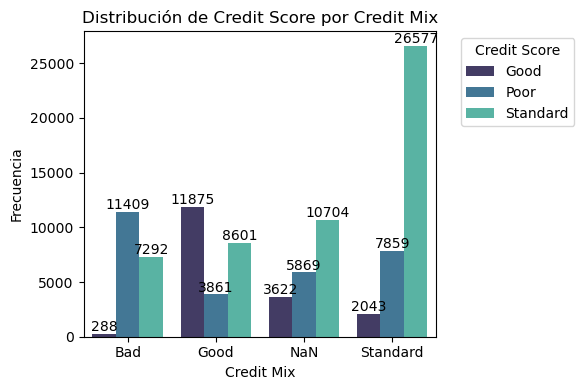

In [30]:
# Crear una copia del DataFrame original
cat_data_new = cat_data.copy()

# Reemplazar NaN en 'Credit_Mix' por la etiqueta 'NaN' utilizando .loc
cat_data_new.loc[:, 'Credit_Mix'] = cat_data_new['Credit_Mix'].fillna('NaN')

# Contar las frecuencias de cada combinación de Credit_Mix y Credit_score
credit_mix_counts = cat_data_new.groupby(['Credit_Mix', 'Credit_Score']).size().reset_index(name='count')

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=credit_mix_counts, x='Credit_Mix', y='count', hue='Credit_Score', palette='mako')

# Ajustar etiquetas y título
plt.xlabel('Credit Mix')
plt.ylabel('Frecuencia')
plt.title('Distribución de Credit Score por Credit Mix')
plt.legend(title='Credit Score', bbox_to_anchor=(1.05, 1), loc='upper left')

# Añadir etiquetas de cantidad en las barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

In [31]:
credit_mix_counts

,Credit_Mix,Credit_Score,count
0,Bad,Good,288
1,Bad,Poor,11409
2,Bad,Standard,7292
3,Good,Good,11875
4,Good,Poor,3861
5,Good,Standard,8601
6,NaN,Good,3622
7,NaN,Poor,5869
8,NaN,Standard,10704
9,Standard,Good,2043


    Elección

* Combinación _NaN - Good_: Se reemplaza el NaN por Standard porque es el conteo que más se le asemeja.
* Combinación _NaN - Poor_: Se reemplaza el NaN por Standard porque es el conteo que más se le asemeja.
* Combinación _NaN - Standard_: Se reemplaza el NaN por Good porque es el conteo que más se le asemeja.

In [32]:
# Reemplazar NaN en 'Credit_Mix' 
dataset_new.loc[dataset_new['Credit_Score'] == 'Good', 'Credit_Mix'] = dataset_new.loc[dataset_new['Credit_Score'] == 'Good', 'Credit_Mix'].fillna('Standard')
dataset_new.loc[dataset_new['Credit_Score'] == 'Poor', 'Credit_Mix'] = dataset_new.loc[dataset_new['Credit_Score'] == 'Poor', 'Credit_Mix'].fillna('Standard')
dataset_new.loc[dataset_new['Credit_Score'] == 'Standard', 'Credit_Mix'] = dataset_new.loc[dataset_new['Credit_Score'] == 'Standard', 'Credit_Mix'].fillna('Good')

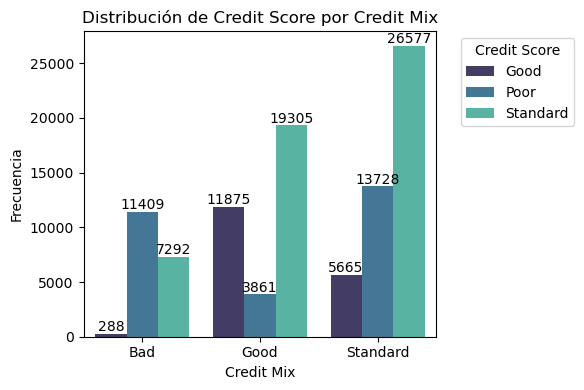

In [33]:
# Reemplazar NaN en 'Credit_Mix' por la etiqueta 'NaN' utilizando .loc
dataset_new.loc[:, 'Credit_Mix'] = dataset_new['Credit_Mix'].fillna('NaN')

# Contar las frecuencias de cada combinación de Credit_Mix y Credit_score
credit_mix_counts_2 = dataset_new.groupby(['Credit_Mix', 'Credit_Score']).size().reset_index(name='count')

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=credit_mix_counts_2, x='Credit_Mix', y='count', hue='Credit_Score', palette='mako')

# Ajustar etiquetas y título
plt.xlabel('Credit Mix')
plt.ylabel('Frecuencia')
plt.title('Distribución de Credit Score por Credit Mix')
plt.legend(title='Credit Score', bbox_to_anchor=(1.05, 1), loc='upper left')

# Añadir etiquetas de cantidad en las barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

In [34]:
credit_mix_counts_2

,Credit_Mix,Credit_Score,count
0,Bad,Good,288
1,Bad,Poor,11409
2,Bad,Standard,7292
3,Good,Good,11875
4,Good,Poor,3861
5,Good,Standard,19305
6,Standard,Good,5665
7,Standard,Poor,13728
8,Standard,Standard,26577


    Type_of_Loan 

In [35]:
dataset_new['Type_of_Loan'].nunique()

6260

    Elección

* **Type_of_Loan**: Comprobando su cardinalidad, es decir, la cantidad de etiquetas vemos que tiene una alta cardinalidad que puede conllevar serios problemas en el modelo, por lo que se decide eliminarla.

In [36]:

dataset_new = dataset_new.drop('Type_of_Loan', axis=1)

    Payment_Behaviour 

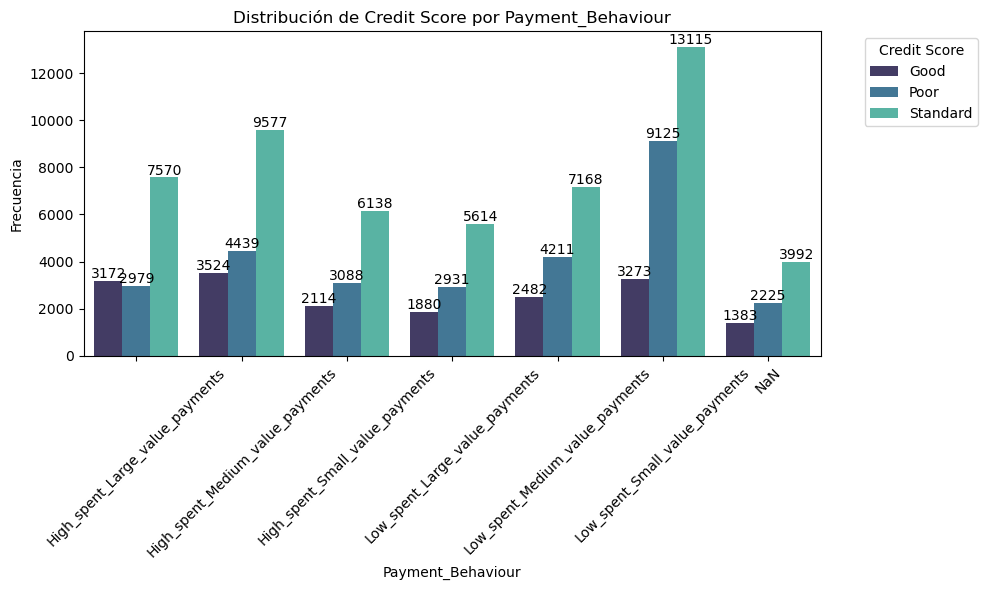

In [37]:
# Reemplazar NaN en 'Payment_Behaviour' por la etiqueta 'NaN' utilizando .loc
cat_data_new.loc[:, 'Payment_Behaviour'] = cat_data_new['Payment_Behaviour'].fillna('NaN')

# Contar las frecuencias de cada combinación de Payment_Behaviour y Credit_score
Payment_Behaviour_counts = cat_data_new.groupby(['Payment_Behaviour', 'Credit_Score']).size().reset_index(name='count')

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
ax = sns.barplot(data= Payment_Behaviour_counts, x='Payment_Behaviour', y='count', hue='Credit_Score', palette='mako')

# Ajustar etiquetas y título
plt.xlabel('Payment_Behaviour')
plt.xticks(rotation=45)
plt.ylabel('Frecuencia')
plt.title('Distribución de Credit Score por Payment_Behaviour')
plt.legend(title='Credit Score', bbox_to_anchor=(1.05, 1), loc='upper left')

# Añadir etiquetas de cantidad en las barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

In [38]:
Payment_Behaviour_counts

,Payment_Behaviour,Credit_Score,count
0,High_spent_Large_value_payments,Good,3172
1,High_spent_Large_value_payments,Poor,2979
2,High_spent_Large_value_payments,Standard,7570
3,High_spent_Medium_value_payments,Good,3524
4,High_spent_Medium_value_payments,Poor,4439
5,High_spent_Medium_value_payments,Standard,9577
6,High_spent_Small_value_payments,Good,2114
7,High_spent_Small_value_payments,Poor,3088
8,High_spent_Small_value_payments,Standard,6138
9,Low_spent_Large_value_payments,Good,1880


    Elección

* Combinación _NaN - Good_: Se reemplaza el NaN por Low_spent_Large_value_payments porque es el conteo que más se le asemeja.
* Combinación _NaN - Poor_: Se reemplaza el NaN por Low_spent_Large_value_payments que más se le asemeja.
* Combinación _NaN - Standard_: Se reemplaza el NaN por Low_spent_Large_value_payments porque es el conteo que más se le asemeja.

In [39]:
# Reemplazar NaN en 'Payment_Behaviour' 
dataset_new.loc[dataset_new['Credit_Score'] == 'Good', 'Payment_Behaviour'] = dataset_new.loc[dataset_new['Credit_Score'] == 'Good', 'Payment_Behaviour'].fillna('Low_spent_Large_value_payments')
dataset_new.loc[dataset_new['Credit_Score'] == 'Poor', 'Payment_Behaviour'] = dataset_new.loc[dataset_new['Credit_Score'] == 'Poor', 'Payment_Behaviour'].fillna('Low_spent_Large_value_payments')
dataset_new.loc[dataset_new['Credit_Score'] == 'Standard', 'Payment_Behaviour'] = dataset_new.loc[dataset_new['Credit_Score'] == 'Standard', 'Payment_Behaviour'].fillna('Low_spent_Large_value_payments')

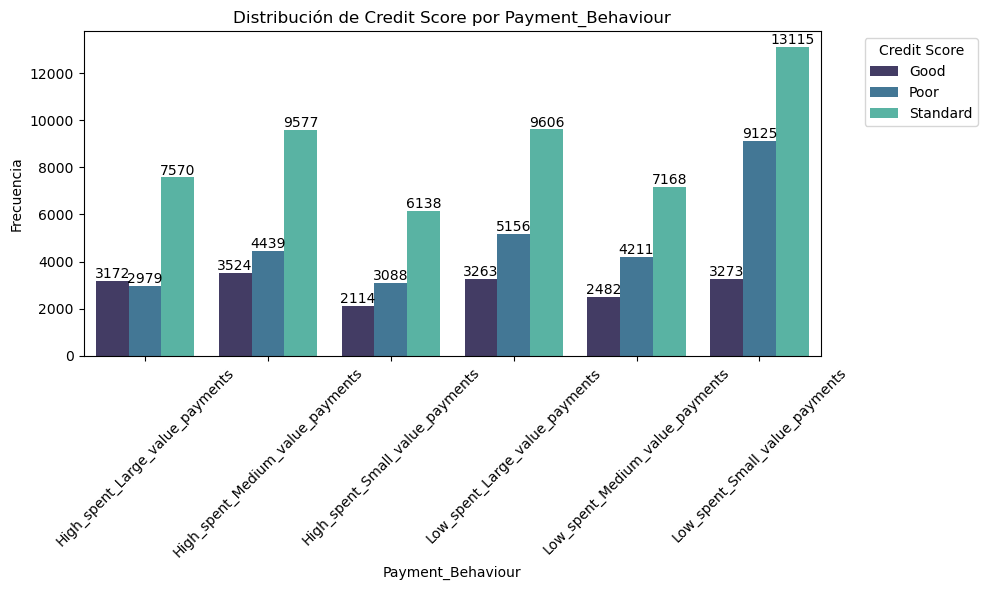

In [40]:
# Reemplazar NaN en 'Payment_Behaviour' por la etiqueta 'NaN' utilizando .loc
dataset_new.loc[:, 'Payment_Behaviour'] = dataset_new['Payment_Behaviour'].fillna('NaN')

# Contar las frecuencias de cada combinación de Payment_Behaviour y Credit_score
Payment_Behaviour_counts_2 = dataset_new.groupby(['Payment_Behaviour', 'Credit_Score']).size().reset_index(name='count')

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
ax = sns.barplot(data= Payment_Behaviour_counts_2, x='Payment_Behaviour', y='count', hue='Credit_Score', palette='mako')

# Ajustar etiquetas y título
plt.xlabel('Payment_Behaviour')
plt.xticks(rotation=45)
plt.ylabel('Frecuencia')
plt.title('Distribución de Credit Score por Payment_Behaviour')
plt.legend(title='Credit Score', bbox_to_anchor=(1.05, 1), loc='upper left')

# Añadir etiquetas de cantidad en las barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

In [41]:
Payment_Behaviour_counts_2

,Payment_Behaviour,Credit_Score,count
0,High_spent_Large_value_payments,Good,3172
1,High_spent_Large_value_payments,Poor,2979
2,High_spent_Large_value_payments,Standard,7570
3,High_spent_Medium_value_payments,Good,3524
4,High_spent_Medium_value_payments,Poor,4439
5,High_spent_Medium_value_payments,Standard,9577
6,High_spent_Small_value_payments,Good,2114
7,High_spent_Small_value_payments,Poor,3088
8,High_spent_Small_value_payments,Standard,6138
9,Low_spent_Large_value_payments,Good,3263


    Occupation

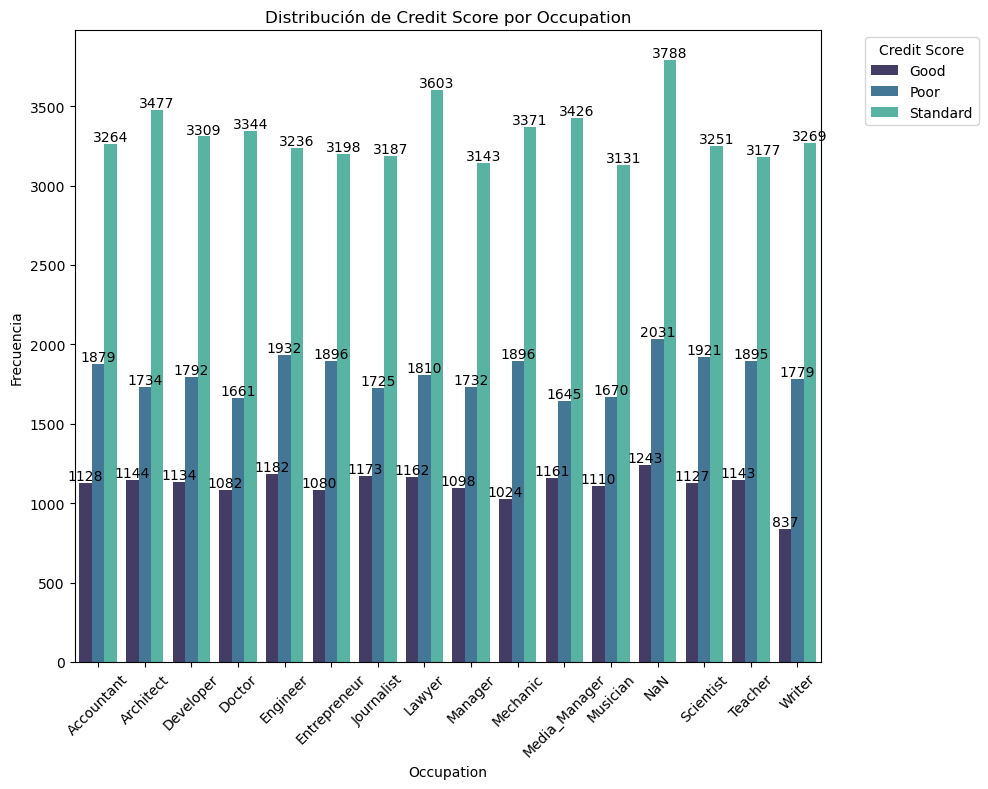

In [42]:
# Reemplazar NaN en 'Occupation' por la etiqueta 'NaN' utilizando .loc
cat_data_new.loc[:, 'Occupation'] = cat_data_new['Occupation'].fillna('NaN')

# Contar las frecuencias de cada combinación de Occupation y Credit_score
Occupation_counts = cat_data_new.groupby(['Occupation', 'Credit_Score']).size().reset_index(name='count')

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(10, 8))
ax = sns.barplot(data= Occupation_counts, x='Occupation', y='count', hue='Credit_Score', palette='mako')

# Ajustar etiquetas y título
plt.xlabel('Occupation')
plt.xticks(rotation=45)
plt.ylabel('Frecuencia')
plt.title('Distribución de Credit Score por Occupation')
plt.legend(title='Credit Score', bbox_to_anchor=(1.05, 1), loc='upper left')

# Añadir etiquetas de cantidad en las barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

In [43]:
Occupation_counts

,Occupation,Credit_Score,count
0,Accountant,Good,1128
1,Accountant,Poor,1879
2,Accountant,Standard,3264
3,Architect,Good,1144
4,Architect,Poor,1734
5,Architect,Standard,3477
6,Developer,Good,1134
7,Developer,Poor,1792
8,Developer,Standard,3309
9,Doctor,Good,1082


    Elección

* Combinación _NaN - Good_: Se reemplaza el NaN por Engineer porque es el conteo que más se le asemeja.
* Combinación _NaN - Poor_: Se reemplaza el NaN por Engineer que más se le asemeja.
* Combinación _NaN - Standard_: Se reemplaza el NaN por Lawyer porque es el conteo que más se le asemeja.

In [44]:
# Reemplazar NaN en 'Occupation' 
dataset_new.loc[dataset_new['Credit_Score'] == 'Good', 'Occupation'] = dataset_new.loc[dataset_new['Credit_Score'] == 'Good', 'Occupation'].fillna('Engineer')
dataset_new.loc[dataset_new['Credit_Score'] == 'Poor', 'Occupation'] = dataset_new.loc[dataset_new['Credit_Score'] == 'Poor', 'Occupation'].fillna('Engineer')
dataset_new.loc[dataset_new['Credit_Score'] == 'Standard', 'Occupation'] = dataset_new.loc[dataset_new['Credit_Score'] == 'Standard', 'Occupation'].fillna('Lawyer')

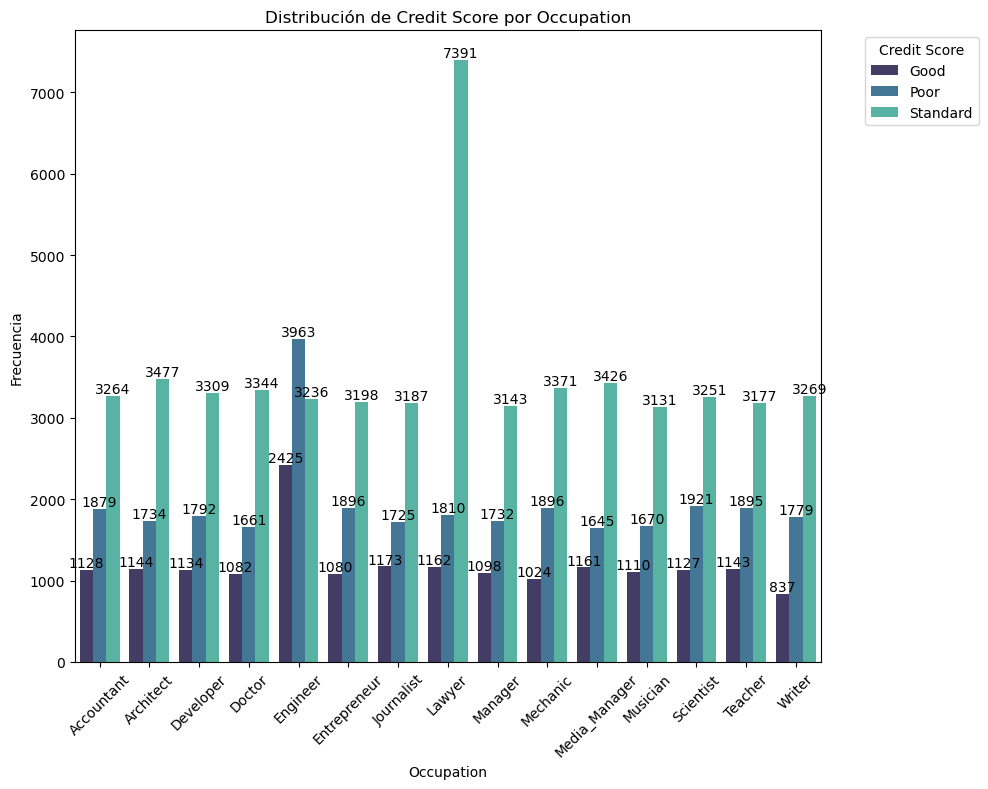

In [45]:
# Reemplazar NaN en 'Occupation' por la etiqueta 'NaN' utilizando .loc
dataset_new.loc[:, 'Occupation'] = dataset_new['Occupation'].fillna('NaN')

# Contar las frecuencias de cada combinación de Occupation y Credit_score
Occupation_counts_2 = dataset_new.groupby(['Occupation', 'Credit_Score']).size().reset_index(name='count')

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(10, 8))
ax = sns.barplot(data= Occupation_counts_2, x='Occupation', y='count', hue='Credit_Score', palette='mako')

# Ajustar etiquetas y título
plt.xlabel('Occupation')
plt.xticks(rotation=45)
plt.ylabel('Frecuencia')
plt.title('Distribución de Credit Score por Occupation')
plt.legend(title='Credit Score', bbox_to_anchor=(1.05, 1), loc='upper left')

# Añadir etiquetas de cantidad en las barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

    Comprobación

In [46]:
cat_col_n = dataset_new.select_dtypes(include=['object'])
cat_col_n.head()

,Month,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,January,Scientist,Standard,No,High_spent_Small_value_payments,Good
1,February,Scientist,Good,No,Low_spent_Large_value_payments,Good
2,March,Scientist,Good,No,Low_spent_Medium_value_payments,Good
3,April,Scientist,Good,No,Low_spent_Small_value_payments,Good
4,May,Scientist,Good,No,High_spent_Medium_value_payments,Good


In [47]:
# Contar valores faltantes despues de la imputación
faltantes_despues_cat = []

for col in cat_col_n.columns:
    porcentaje_faltante = cat_col_n[col].isnull().mean()
    if(porcentaje_faltante>0):
        faltantes_despues_cat.append(col)

dataset_new[faltantes_despues_cat].isnull().mean().sort_values(ascending=False)

Series([], dtype: float64)

In [48]:
dataset_new.isnull().sum()

Month                        0
Age                          0
Occupation                   0
Annual_Income                0
Monthly_Inhand_Salary        0
Num_Bank_Accounts            0
Num_Credit_Card              0
Interest_Rate                0
Num_of_Loan                  0
Delay_from_due_date          0
Num_of_Delayed_Payment       0
Changed_Credit_Limit         0
Num_Credit_Inquiries         0
Credit_Mix                   0
Outstanding_Debt             0
Credit_Utilization_Ratio     0
Payment_of_Min_Amount        0
Total_EMI_per_month          0
Amount_invested_monthly      0
Payment_Behaviour            0
Monthly_Balance              0
Credit_Score                 0
Credit_History_Age_Months    0
dtype: int64

<a id="encoding"></a>
## 1.2 🧬 Codificación de Variables Categóricas

In [49]:
# DataFrame con variables categóricas
categorical_features = dataset_new.select_dtypes(include=['object'])
categorical_features.columns

Index(['Month', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

In [50]:
for var in categorical_features:
    print(var, ' contains ', len(dataset[var].unique()), ' labels')

Month  contains  8  labels
Occupation  contains  16  labels
Credit_Mix  contains  4  labels
Payment_of_Min_Amount  contains  3  labels
Payment_Behaviour  contains  7  labels
Credit_Score  contains  3  labels


    Elección

* **Month**: Se decidió codificar según el orden de los meses iniciando 1 con enero y 12 como diciembre.
* **Occupation**: Debido a que la ocupación no tiene un orden no se utilizó el ordinal encoder pero sí el label por ser una etiqueta.
* **Credit_Mix**: Debido a que según la clasificación si lleva un orden si codificó con el ordinal encoder.
* **Payment_of_Min_Amount**: Ya que, luego de la transformación, solo quedaron 2 valores, se códfico con 1 para yes y 0 para no.
* **Payment_Behaviour**: También se identificó que tenía un orden, así que se codificó con el ordinal.
* **Credit_Score**: Según la clasificación también se puede identificar un orden, por lo que se codificó con ordinal encoder.

    Month

In [51]:
# Crear un diccionario para mapear los nombres de los meses a números
month_num = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8}

# Aplicar la codificación a la columna 'month' utilizando el método map
dataset_new['Month'] = dataset_new['Month'].map(month_num)

# Verificar los resultados
dataset_new['Month'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

    Occupation

In [52]:
label_encoder = LabelEncoder()
dataset_new['Occupation'] = label_encoder.fit_transform(dataset_new['Occupation'])

dataset_new['Occupation'].unique()

array([12,  7, 13,  4,  5,  2, 10,  3,  6,  8,  0, 11,  9, 14,  1])

    Credit_Mix

In [53]:
categories = ['Bad', 'Standard', 'Good']

encoder = OrdinalEncoder(categories=[categories])

dataset_new['Credit_Mix'] = encoder.fit_transform(dataset_new[['Credit_Mix']])

dataset_new['Credit_Mix'].unique()

array([1., 2., 0.])

    Payment_of_Min_Amount

In [54]:
dataset_new['Payment_of_Min_Amount'].replace("NM","No",inplace=True)

In [55]:
dataset_new['Payment_of_Min_Amount'] = dataset_new['Payment_of_Min_Amount'].replace({'Yes': 1, 'No': 0})

dataset_new['Payment_of_Min_Amount'].unique()

array([0, 1], dtype=int64)

    Payment_Behaviour 

In [56]:
categories_payment_behaviour = [
    'Low_spent_Small_value_payments', 
    'Low_spent_Medium_value_payments', 
    'Low_spent_Large_value_payments', 
    'High_spent_Small_value_payments', 
    'High_spent_Medium_value_payments', 
    'High_spent_Large_value_payments'
]

encoder_payment_behaviour = OrdinalEncoder(categories=[categories_payment_behaviour])

dataset_new['Payment_Behaviour'] = encoder_payment_behaviour.fit_transform(dataset_new[['Payment_Behaviour']])

dataset_new['Payment_Behaviour'].unique()

array([3., 2., 1., 0., 4., 5.])

    Credit_Score

In [57]:
categories = ['Poor', 'Standard', 'Good']

encoder = OrdinalEncoder(categories=[categories])

dataset_new['Credit_Score'] = encoder.fit_transform(dataset_new[['Credit_Score']])

dataset_new['Credit_Score'].unique()

array([2., 1., 0.])

    Comprobación

In [58]:
dataset_new[categorical_features.columns].dtypes

Month                      int64
Occupation                 int32
Credit_Mix               float64
Payment_of_Min_Amount      int64
Payment_Behaviour        float64
Credit_Score             float64
dtype: object

<a id="outliers"></a>
## 1.3 💯 Tratamiento de Outliers

    Tipos de Variables

In [59]:
def get_variables_scale(dataset):

       categoricas = [col for col in dataset.columns if dataset[col].dtype == 'object']
       continuas = [col for col in dataset.columns if dataset[col].dtype in ['float64', 'int64'] and len(dataset[col].unique()) > 30]
       discretas = [col for col in dataset.columns if dataset[col].dtype in ['float64', 'int64'] and len(dataset[col].unique()) <= 30]

       return categoricas, continuas, discretas

In [60]:
cat, cont, disct = get_variables_scale(dataset_new)

In [61]:
def plot_outliers_analysis(dataset, col):
    plt.figure(figsize=(10,2))

    print(col)

    plt.subplot(131)
    #sns.histplot(dataHP['LotFrontage'], bins=30)
    dataset[col].hist(bins=50, density=True, color='red')
    plt.title('Densidad - Histograma')

    plt.subplot(132)
    stats.probplot(dataset[col], dist='norm', plot=plt)
    plt.title('QQ - Plot')

    plt.subplot(133)
    sns.boxplot(y=dataset[col])
    plt.title('Boxplot')

    plt.show()

Age


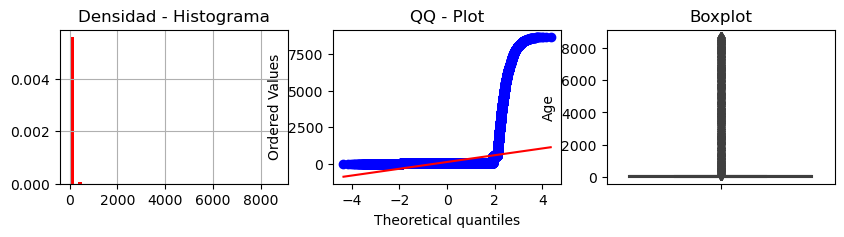

Annual_Income


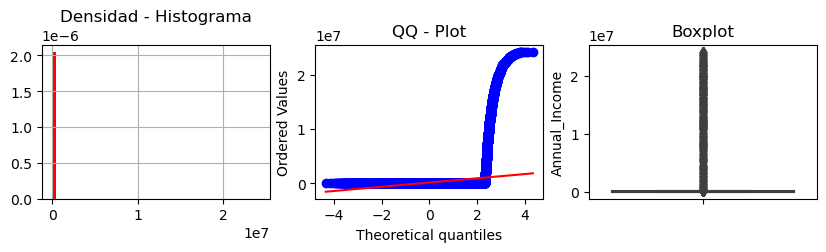

Monthly_Inhand_Salary


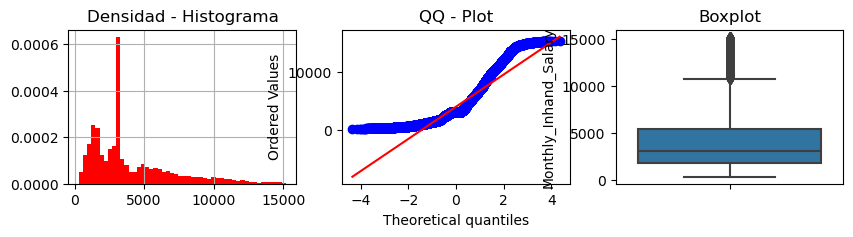

Num_Bank_Accounts


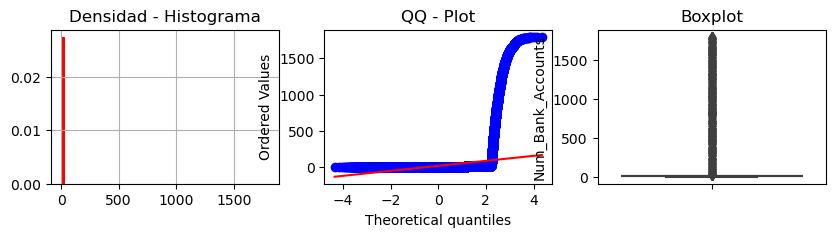

Num_Credit_Card


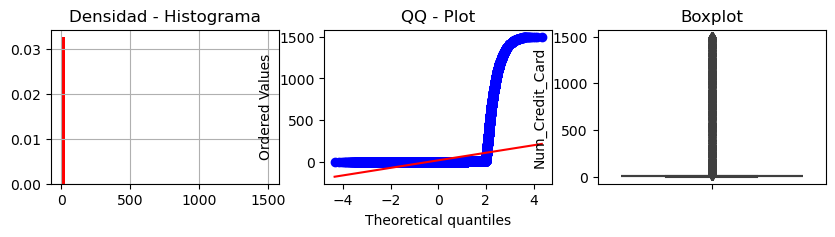

Interest_Rate


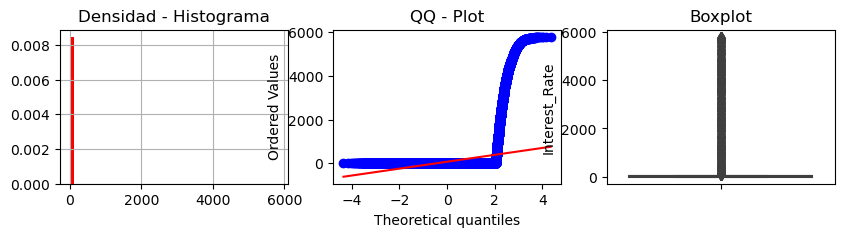

Num_of_Loan


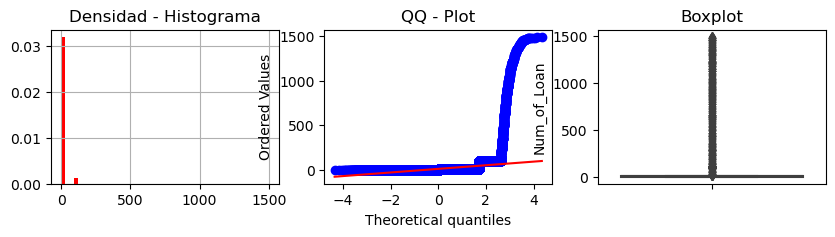

Delay_from_due_date


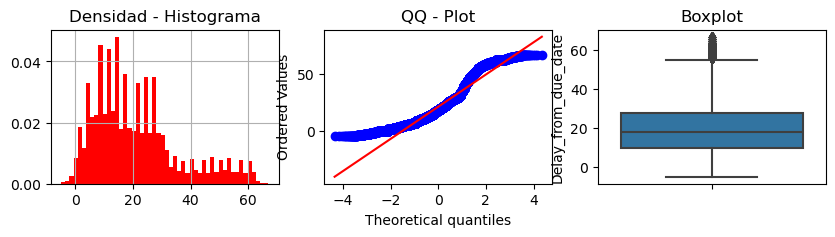

Num_of_Delayed_Payment


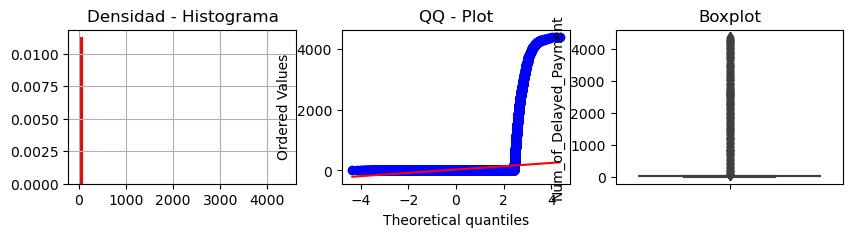

Changed_Credit_Limit


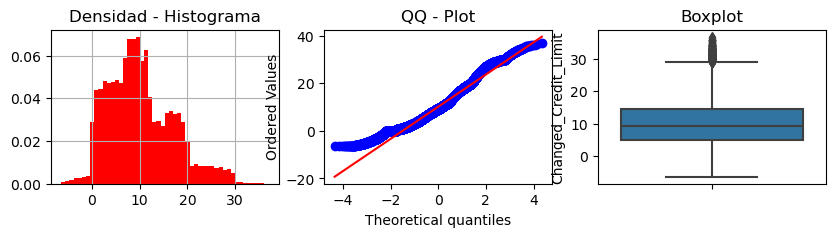

Num_Credit_Inquiries


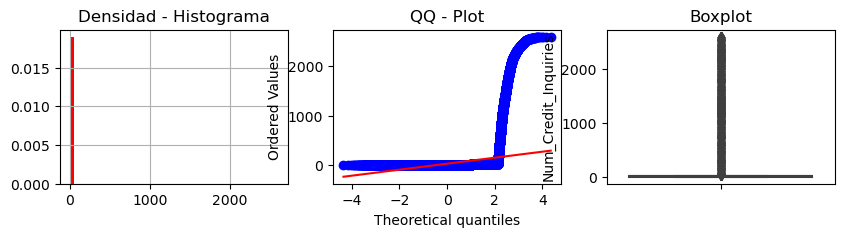

Outstanding_Debt


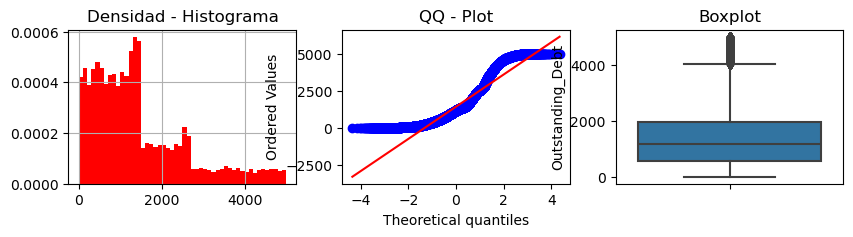

Credit_Utilization_Ratio


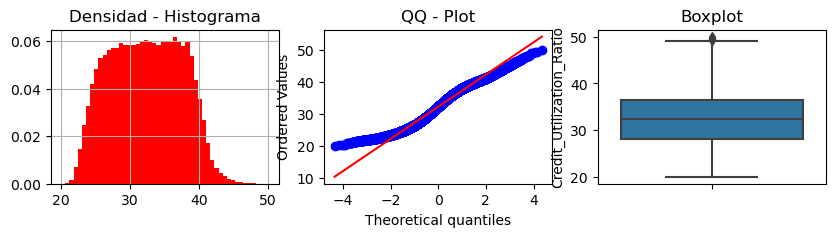

Total_EMI_per_month


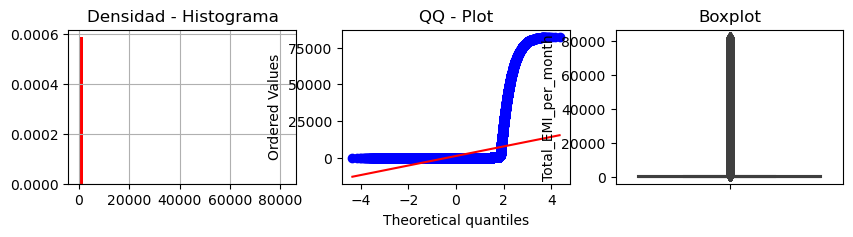

Amount_invested_monthly


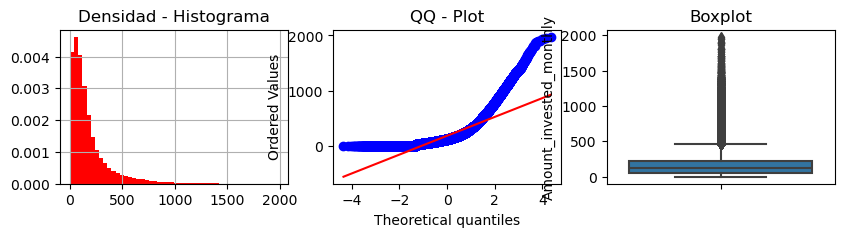

Monthly_Balance


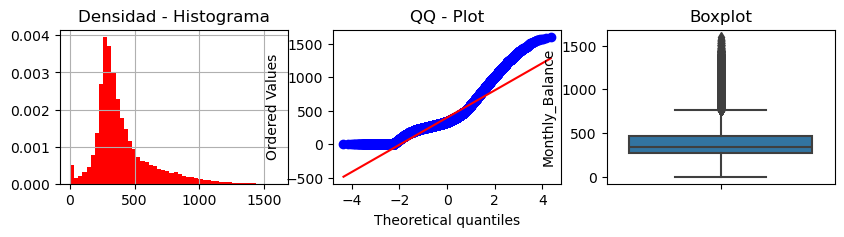

Credit_History_Age_Months


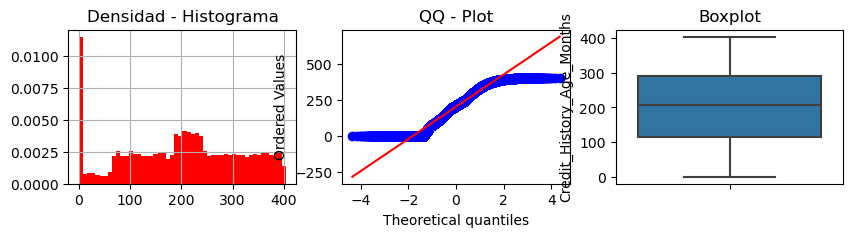

In [62]:
for col in cont:
    plot_outliers_analysis(dataset_new, col)

In [63]:
def get_outliers_limits(dataset, col):
    IQR = dataset[col].quantile(0.75) - dataset[col].quantile(0.25)
    LI = dataset[col].quantile(0.25) - (1.5*IQR)
    LS = dataset[col].quantile(0.75) + (1.5*IQR)

    return LI, LS

In [64]:
dataset_new2 = dataset_new.copy()

In [65]:
for col in cont:
    LI, LS = get_outliers_limits(dataset_new2, col)
    dataset_new2[col]= np.where(dataset_new2[col]>LS, LS,
         np.where(dataset_new2[col]<LI, LI, dataset_new2[col]))

Age


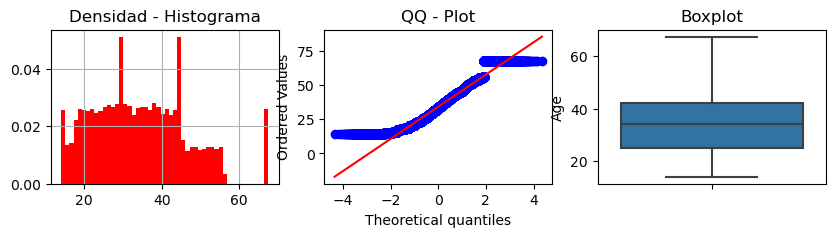

Annual_Income


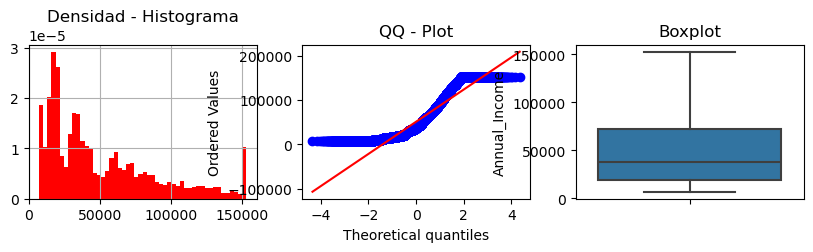

Monthly_Inhand_Salary


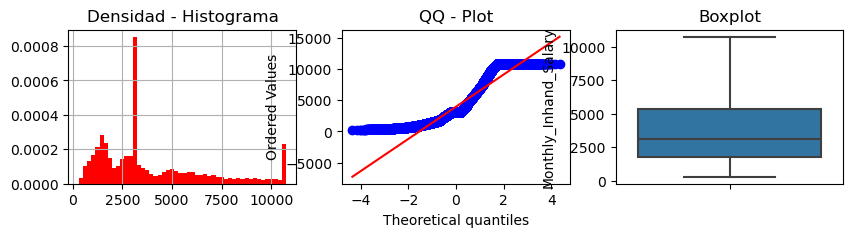

Num_Bank_Accounts


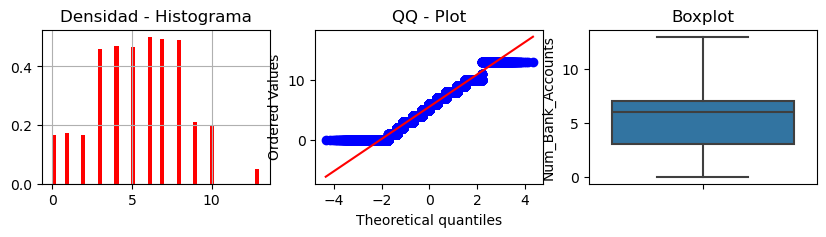

Num_Credit_Card


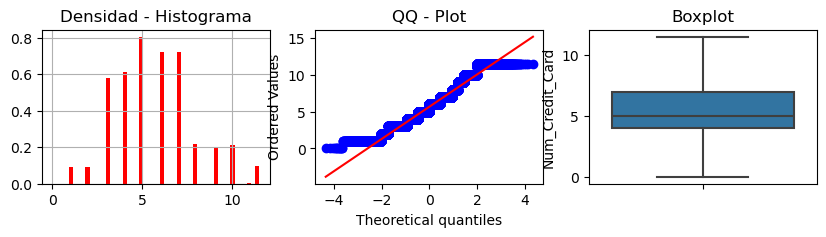

Interest_Rate


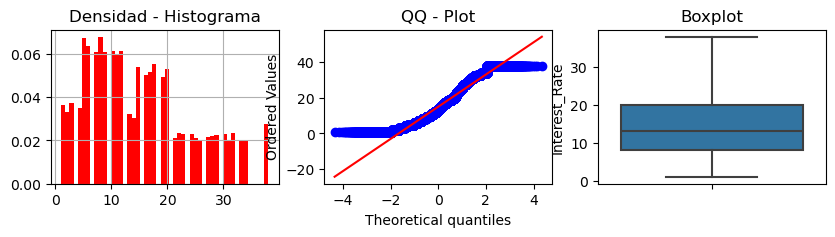

Num_of_Loan


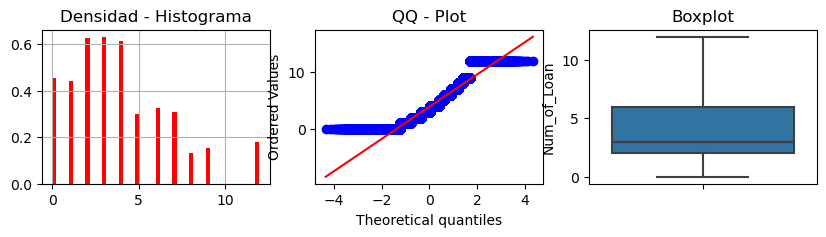

Delay_from_due_date


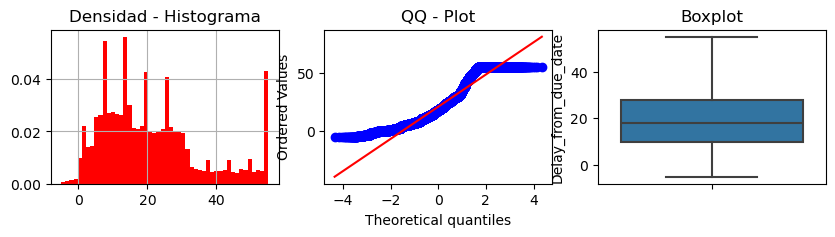

Num_of_Delayed_Payment


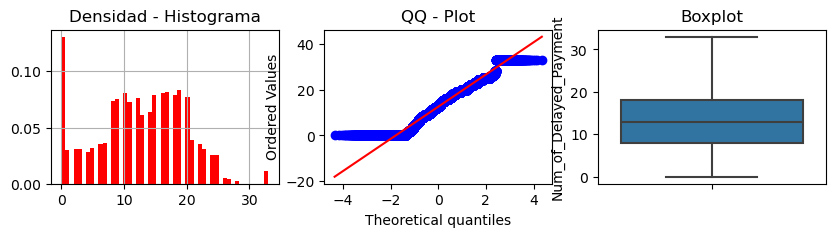

Changed_Credit_Limit


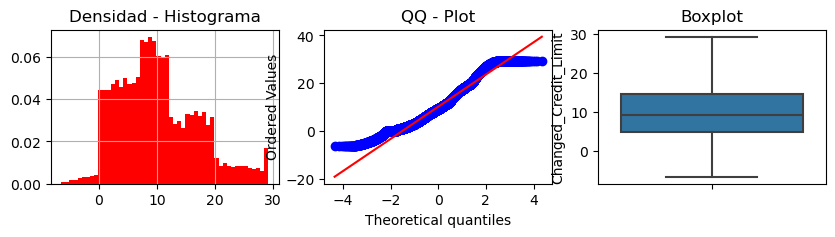

Num_Credit_Inquiries


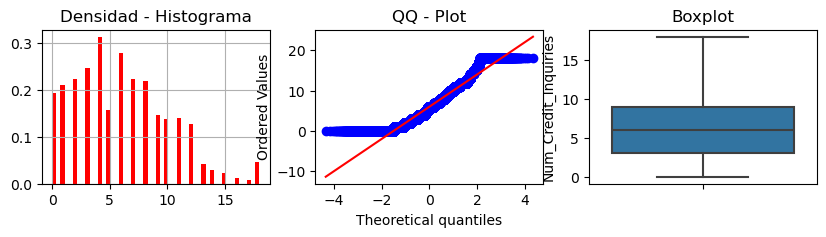

Outstanding_Debt


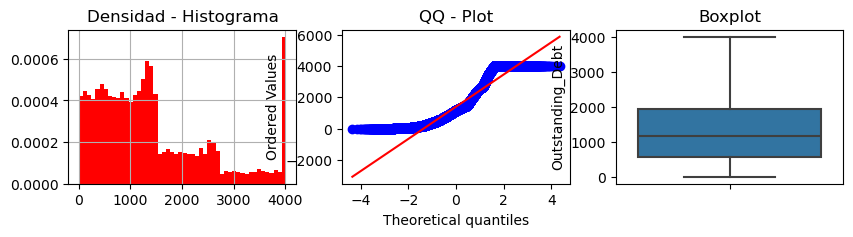

Credit_Utilization_Ratio


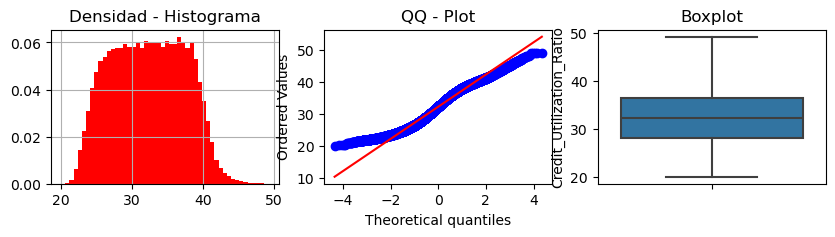

Total_EMI_per_month


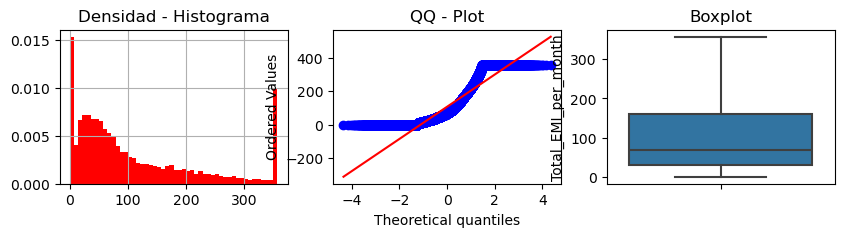

Amount_invested_monthly


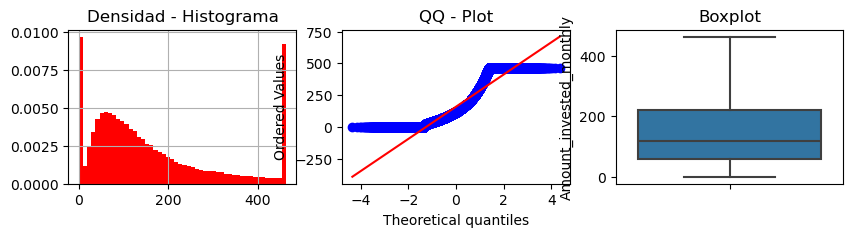

Monthly_Balance


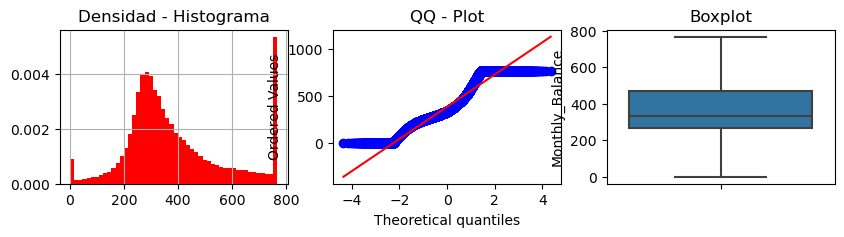

Credit_History_Age_Months


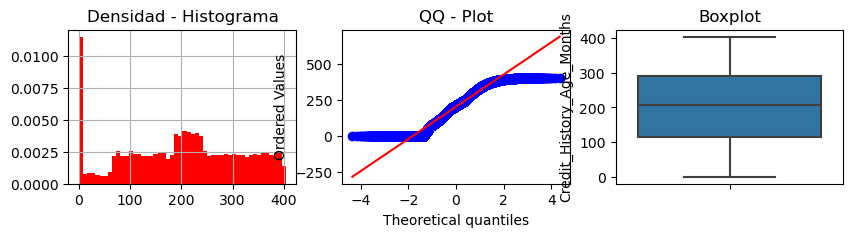

In [66]:
for col in cont:
    plot_outliers_analysis(dataset_new2, col)

    Elección

Se decidió el método Capping y no el del Valor Arbitrario debido a que sería difícil determinar un valor apropiado, ya que, no se tiene el conocimiento de un umbral razonable.
El valor fue 1.5, ya que, al probar con 1.75 o 3, aún quedaban valores atípicos en el dataset.

In [67]:
for col in cont:
    LI, LS = get_outliers_limits(dataset_new, col)
    dataset_new[col]= np.where(dataset_new[col]>LS, LS,
         np.where(dataset_new[col]<LI, LI, dataset_new[col]))

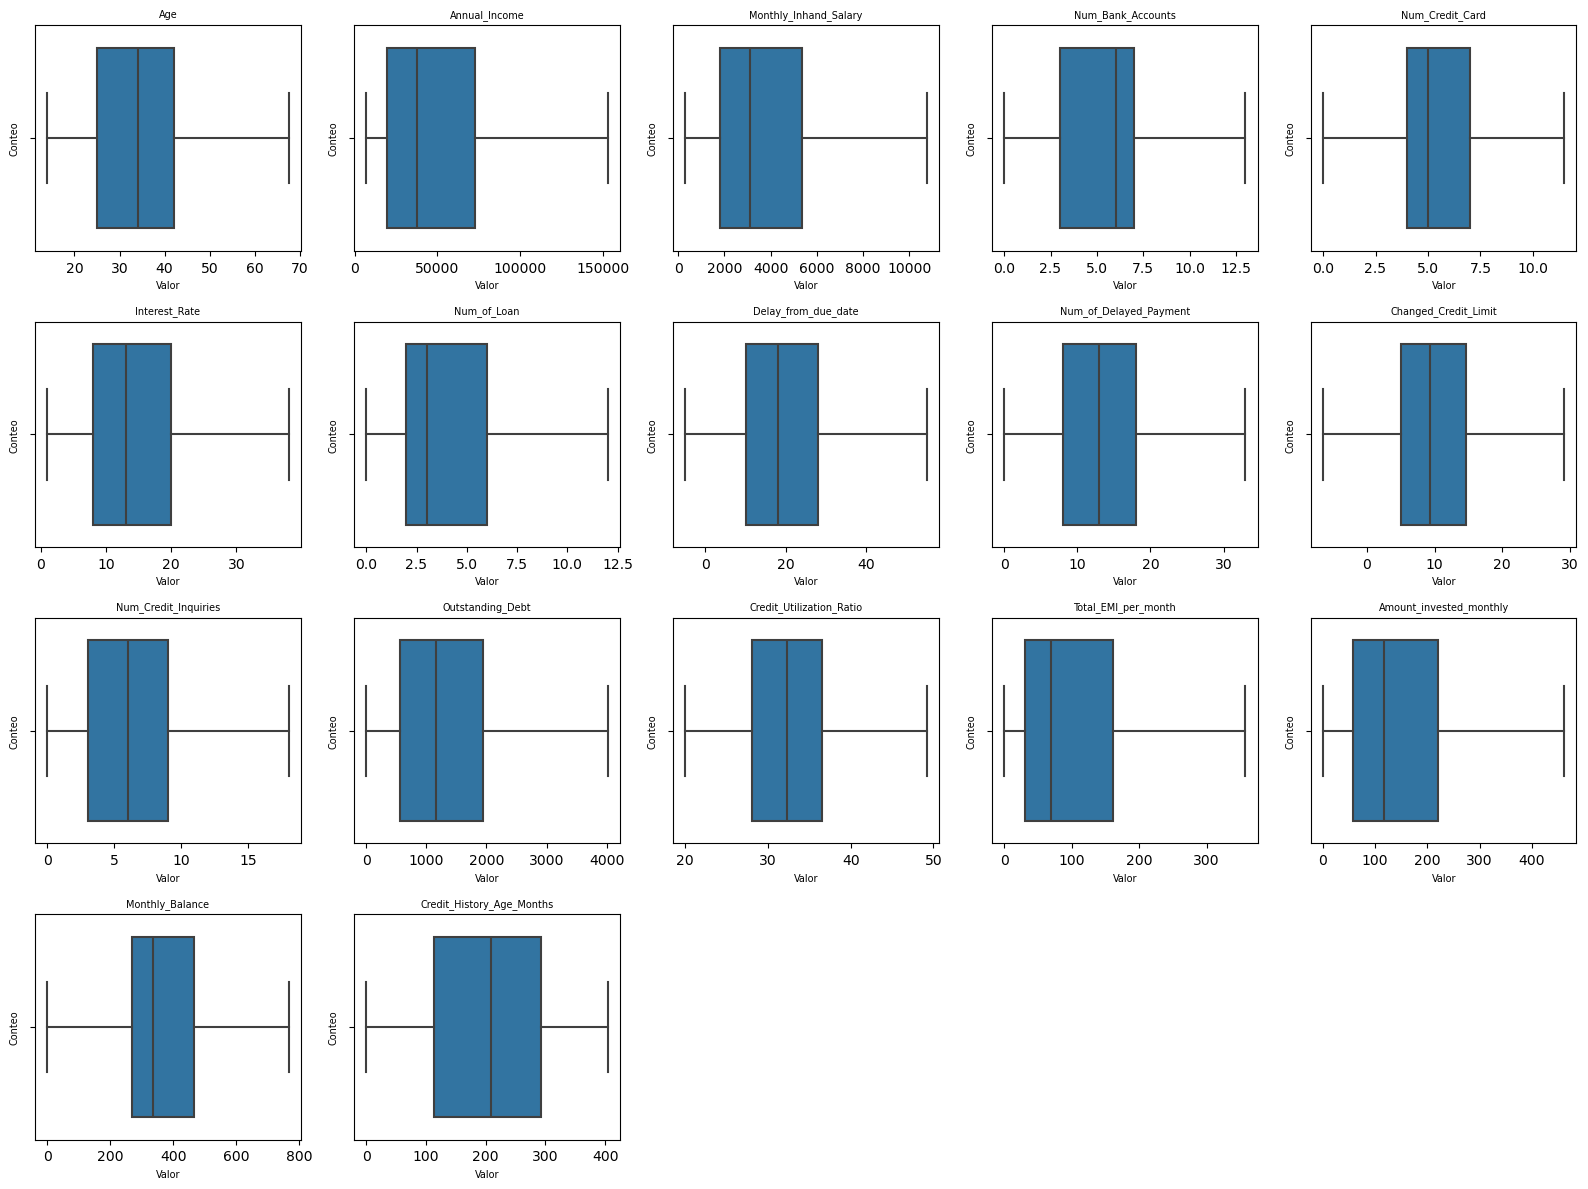

In [68]:
num_columns = 5
num_rows = (len(cont) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 12))

axes = axes.flatten()

for i, column in enumerate(cont):
    sns.boxplot(x=dataset_new[column], ax=axes[i])
    axes[i].set_title(column, fontsize=7)  
    axes[i].set_xlabel('Valor', fontsize=7)  
    axes[i].set_ylabel('Conteo', fontsize=7)  

for j in range(len(cont), num_columns*num_rows):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

<a id="transformation"></a>
## 1.4 📚 Transformación de Variables

    Verificar la Distribución

In [69]:
def plot_density_qq(df, variable):
    plt.figure(figsize=(7,3))

    print(variable)

    plt.subplot(121)
    df[variable].hist(bins=30)
    plt.title(variable)

    plt.subplot(122)
    stats.probplot(df[variable], dist='norm', plot=plt)
    plt.show()

Age


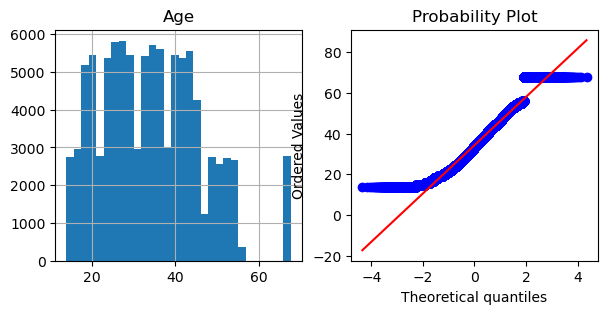

Annual_Income


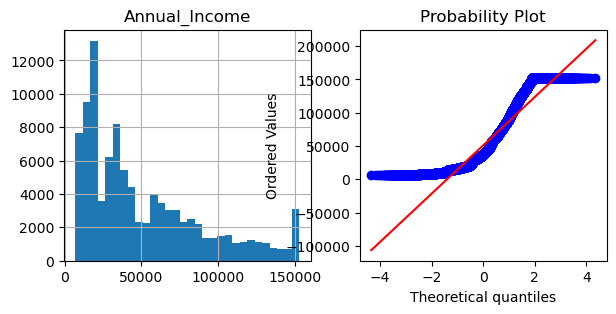

Monthly_Inhand_Salary


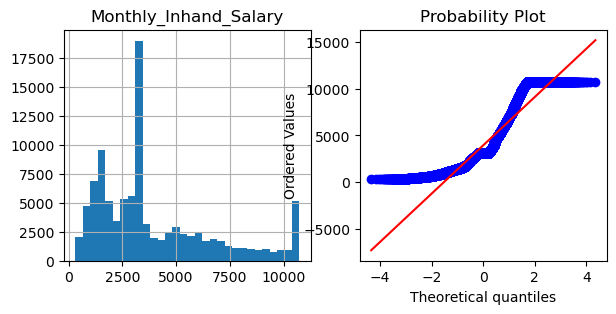

Num_Bank_Accounts


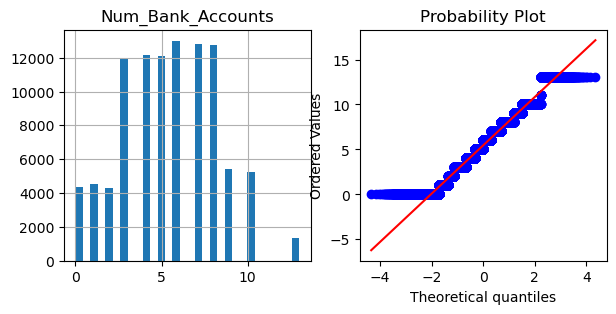

Num_Credit_Card


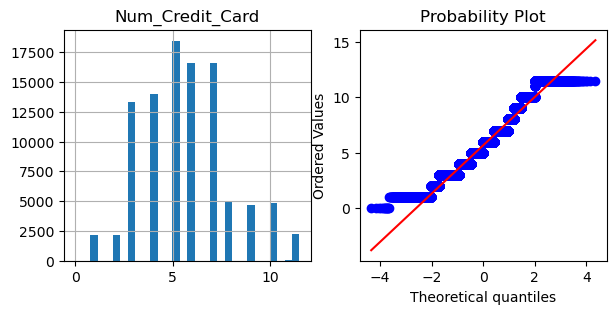

Interest_Rate


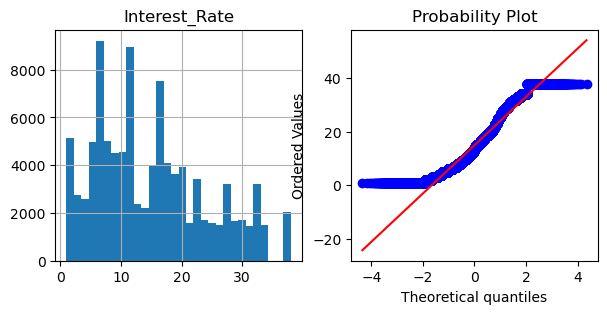

Num_of_Loan


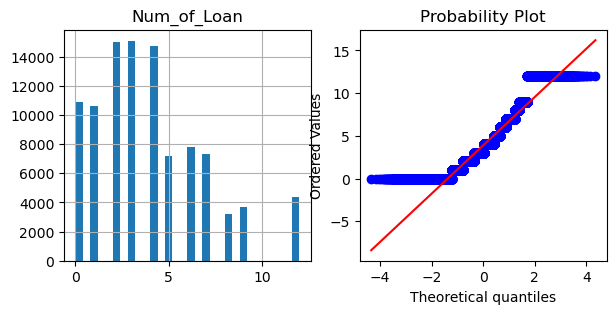

Delay_from_due_date


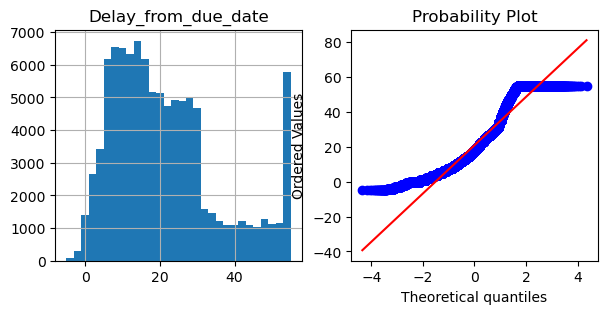

Num_of_Delayed_Payment


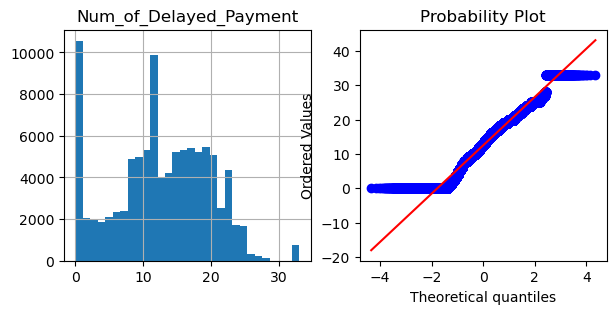

Changed_Credit_Limit


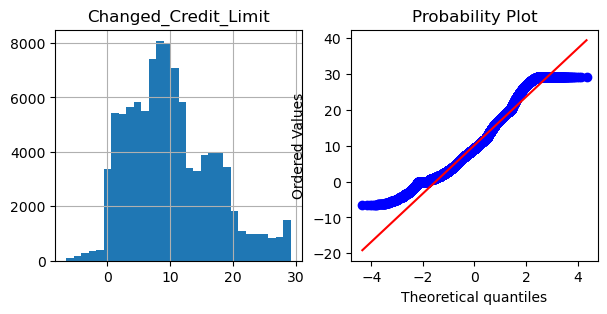

Num_Credit_Inquiries


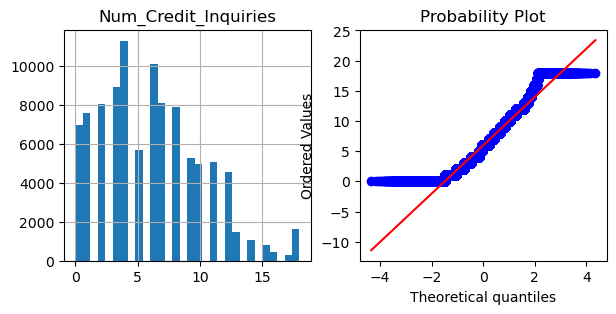

Outstanding_Debt


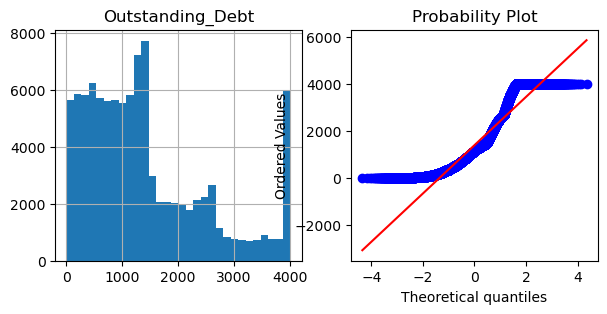

Credit_Utilization_Ratio


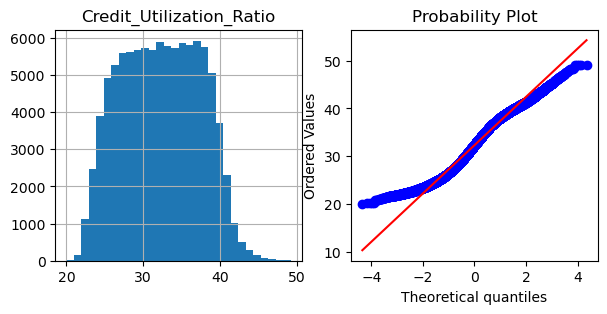

Total_EMI_per_month


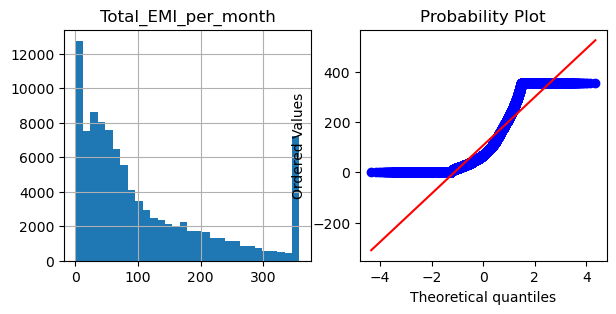

Amount_invested_monthly


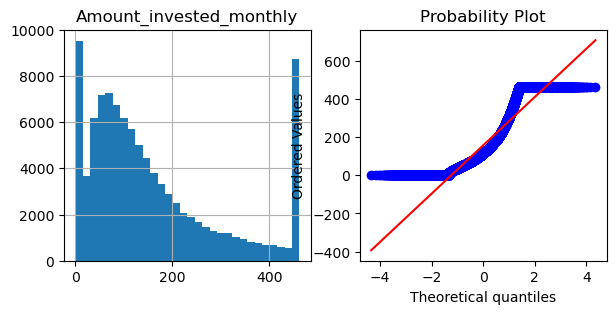

Monthly_Balance


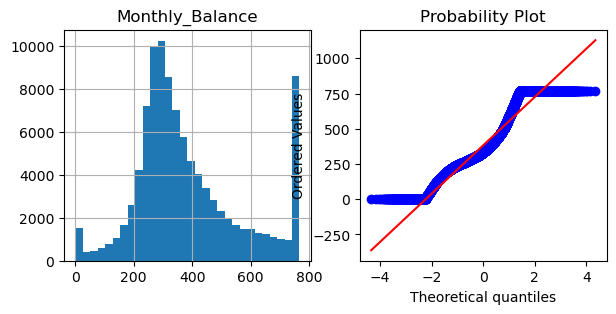

Credit_History_Age_Months


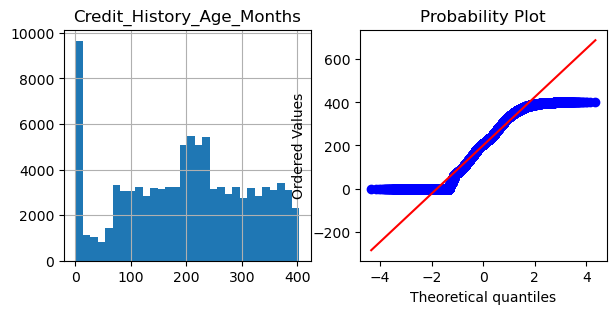

In [70]:
for col in cont:
    plot_density_qq(dataset_new, col)

    Valores Negativos o Ceros

In [71]:
negative_columns = dataset_new[cont].columns[(dataset_new[cont] < 0).any()].tolist()
negative_columns

['Delay_from_due_date', 'Changed_Credit_Limit']

In [72]:
cero_columns = dataset_new[cont].columns[(dataset_new[cont] == 0).any()].tolist()
cero_columns

['Num_Bank_Accounts',
 'Num_Credit_Card',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance',
 'Credit_History_Age_Months']

    Elección

Debido a que el dataset cuenta con columnas que tiene valores negativos y ceros, la transformación que permite trabajar con este tipo de datos es la Yeo-Johnson.

0.2826
Age


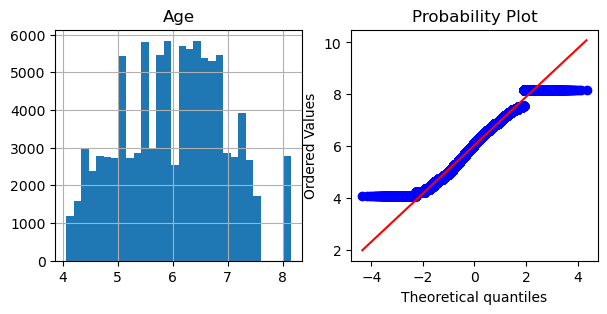

0.057
Annual_Income


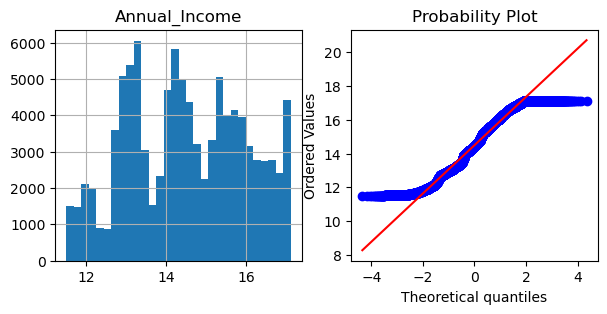

0.1225
Monthly_Inhand_Salary


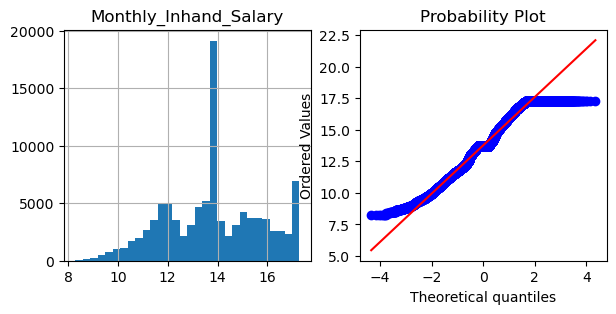

0.9021
Num_Bank_Accounts


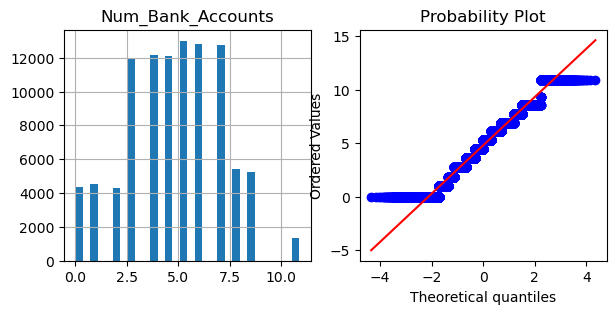

0.5486
Num_Credit_Card


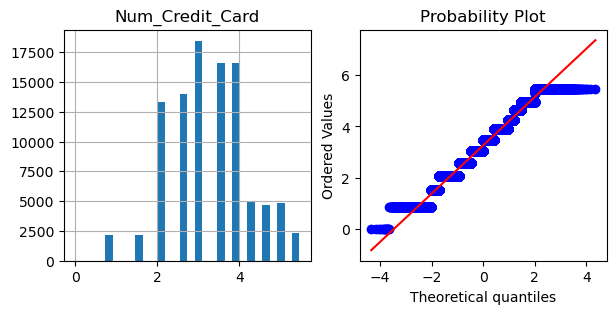

0.4173
Interest_Rate


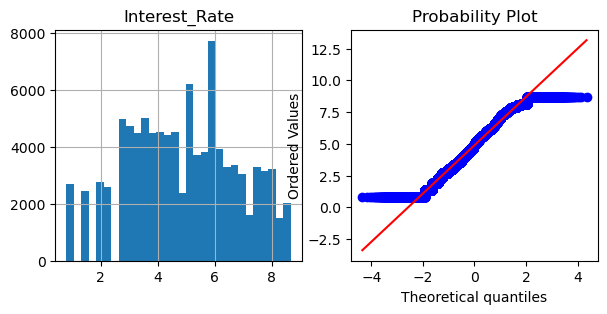

0.3342
Num_of_Loan


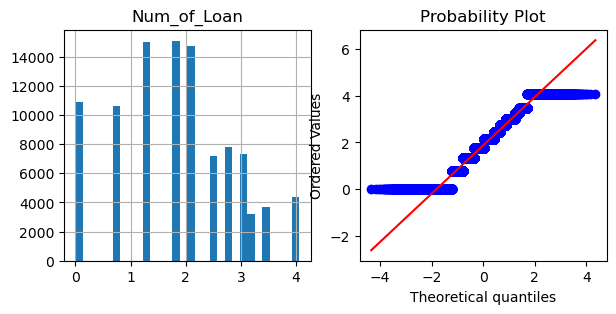

0.5094
Delay_from_due_date


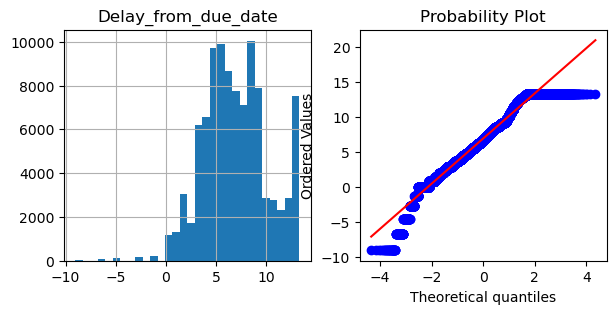

0.8559
Num_of_Delayed_Payment


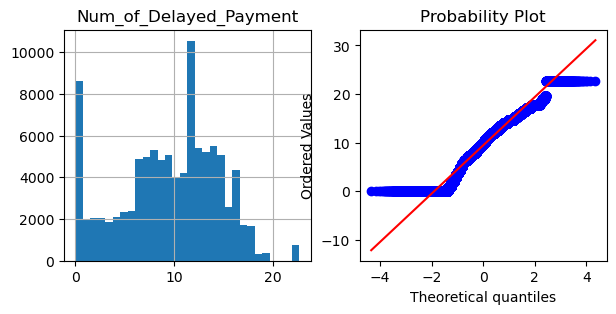

0.7181
Changed_Credit_Limit


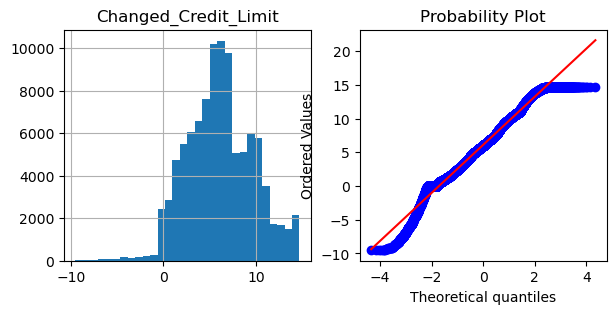

0.4803
Num_Credit_Inquiries


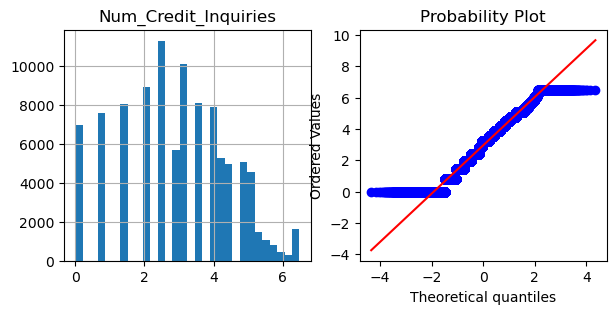

0.3777
Outstanding_Debt


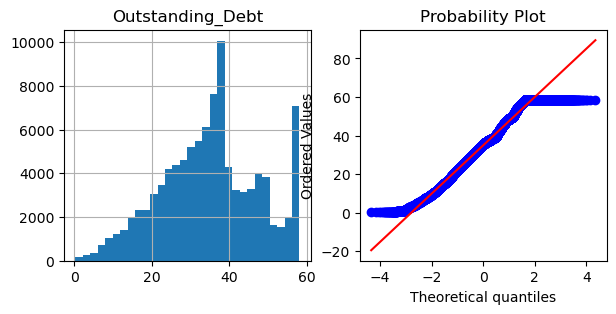

0.7313
Credit_Utilization_Ratio


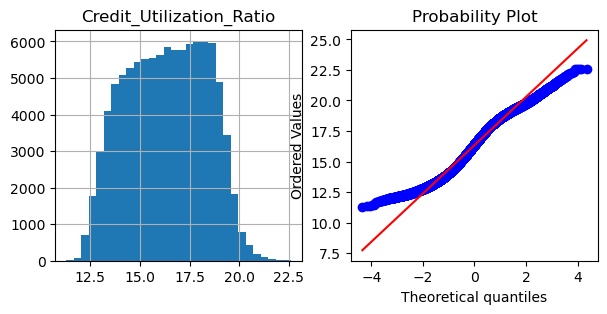

0.3364
Total_EMI_per_month


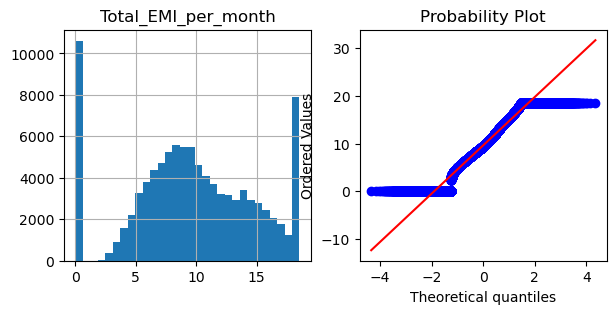

0.4132
Amount_invested_monthly


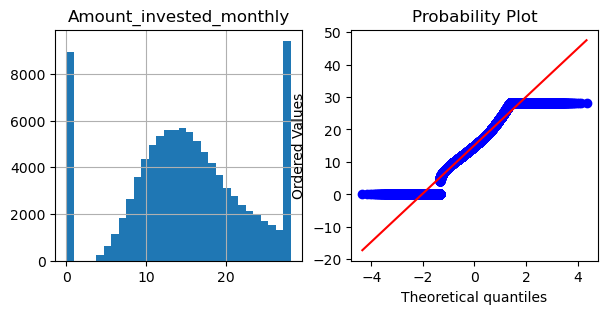

0.6409
Monthly_Balance


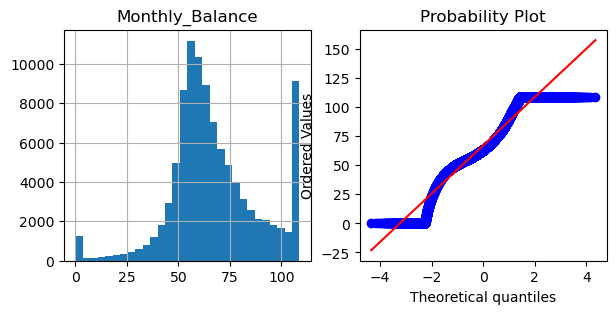

0.7254
Credit_History_Age_Months


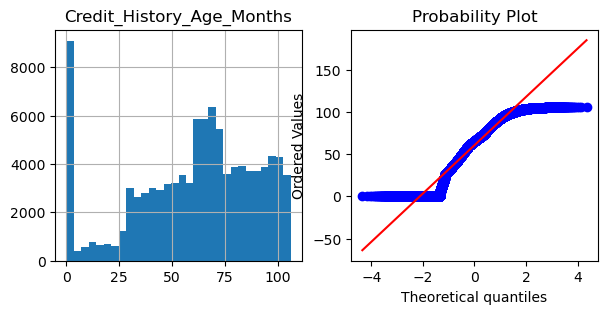

In [73]:
for col in cont:
    dataset_new[col], lmbd =stats.yeojohnson(dataset_new[col])
    lmbd = str(round(lmbd,4))
    print(lmbd)
    plot_density_qq(dataset_new, col)

<a id="scaling"></a>
## 1.5 ⚖️ Feature Scaling

    Elección

Se eligió la 'Estandarización', ya que, la 'Normalización de la Media' no ajusta la desviación estándar, lo que puede ser menos efectivo para algunos algoritmos que asumen distribuciones normales, la 'MinMax Scaling' sería útil para algoritmos como los basados en redes neuronales que no asumen ninguna distribución, 'Max Absolute Scaling' no ajusta la desviación estándar ni la media y, el 'Robust Scaling' sería útil si el dataset tuviera valores atípicos significativos. La 'Estandarización' es útil para algoritmos que asumen que los datos tienen una distribución y también conserva el signo original de los datos.

In [74]:
# Inicializar el StandardScaler
#scaler = StandardScaler()

# Ajustar y transformar los datos
#dataset_new[cont] = scaler.fit_transform(dataset_new[cont])
#dataset_new[cont].head()

<a id="new_features"></a>
## 1.6 ⚙️ Nuevas características

In [75]:
# Calcular el número total de cuentas. (Bank Accounts + Credit Cards)
dataset_new['Total_Num_Accounts'] = dataset_new['Num_Bank_Accounts'] + dataset_new['Num_Credit_Card']


In [76]:
# Calcular la deuda total pendiente por cuenta
dataset_new['Debt_Per_Account'] = dataset_new['Outstanding_Debt'] / dataset_new['Total_Num_Accounts']

In [77]:
# Calcular la relación entre la deuda pendiente y los ingresos anuales.
dataset_new['Debt_to_Income_Ratio'] = dataset_new['Outstanding_Debt'] / dataset_new['Annual_Income']

In [78]:
# Calcular el número total de pagos retrasados ​​por cuenta
dataset_new['Delayed_Payments_Per_Account'] = dataset_new['Num_of_Delayed_Payment'] / dataset_new['Total_Num_Accounts']

In [79]:
# Calcular los gastos mensuales totales. (EMI + Monthly Investments) 
dataset_new['Total_Monthly_Expenses'] = dataset_new['Total_EMI_per_month'] + dataset_new['Amount_invested_monthly']

In [82]:
dataset_new.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months,Total_Num_Accounts,Debt_Per_Account,Debt_to_Income_Ratio,Delayed_Payments_Per_Account,Total_Monthly_Expenses
0,1,5.148189,12,13.228141,12.320969,2.76288,2.584791,1.877238,2.131592,2.014531,...,12.485315,3.0,60.534116,2.0,77.758373,5.347671,5.720625,2.312647,1.076782,20.638562
1,2,5.148189,12,13.228141,13.688942,2.76288,2.584791,1.877238,2.131592,-1.214334,...,15.033250,2.0,56.937940,2.0,0.000000,5.347671,5.720625,2.312647,0.000000,23.186497
2,3,8.144718,12,13.228141,13.688942,2.76288,2.584791,1.877238,2.131592,2.014531,...,12.582018,1.0,62.885196,2.0,78.189536,5.347671,5.720625,2.312647,1.076782,20.735266
3,4,5.148189,12,13.228141,13.688942,2.76288,2.584791,1.877238,2.131592,2.927042,...,19.208945,0.0,48.564494,2.0,78.404786,5.347671,5.720625,2.312647,0.647792,27.362192
4,5,5.148189,12,13.228141,12.320969,2.76288,2.584791,1.877238,2.131592,3.326497,...,8.965410,4.0,64.156220,2.0,78.619816,5.347671,5.720625,2.312647,0.000000,17.118657


## 3. 🗃️ Guardar Dataset
<a id="saving-files"></a> 

In [81]:
dataset_new_2 = dataset_new.copy()

# Guardar el nuevo DataFrame en un archivo CSV
dataset_new_2.to_csv('./Datasets/dataset_new_2.csv', index=False)

print("Nuevo dataset guardado en 'dataset_new_2.csv'")

Nuevo dataset guardado en 'dataset_new_2.csv'
